In [ ]:
import sympy
import numpy as np
import pandas as pd
from sympy import latex, Matrix, symbols, lambdify, S
import matplotlib.pyplot as plt
from IPython.display import Latex
from google.colab import files
from skimage import io

# Практическое занятие 13
# Компьютерный практикум по алгебре на Python

## Собственные числа и собственные векторы линейного оператора.
### Задание 1.
Описать функцию одного обязательного аргумента - матрицы $A$, возвращающую максимальное по модулю собственное число и соответствующий собственный вектор матрицы.

Вывести на экран все собственные числа и собственные векторы матрицы
$$
\left(\begin{matrix}
1 & 0 & 0 & -2\\
0 & 1 & 0 & 1\\
0 & 0 & 2 & 1\\
-1 & 0 & 0 & 1
\end{matrix}\right)
$$

Записать в файл .tex максимальное по модулю собственное число и соответствующий собственный вектор.



In [ ]:
B = Matrix([[1, 0, 0,-2], [0, 1, 0,1], [0, 0, 2,1], [-1,0,0,1]])
res = B.eigenvects()
display(Latex(latex(res)))
text = """ \\documentclass[11pt]{report}\n
\\usepackage[T2A]{fontenc}\n
\\usepackage[utf8]{inputenc}\n
\\usepackage[russian]{babel}\n
\\usepackage{amsmath,amssymb}\n
\\begin{document}\n
{\\bf Пример 1.}\n\n"""
end_text = "\n\n\\end{document}"
fname = 'sem_13_example_1.tex'
with open(fname, 'w', encoding='utf-8') as f:
    f.write(text + latex(res, mode='inline') + end_text)

<IPython.core.display.Latex object>

## Собственные векторы numpy
### Задание 2.
Считать матрицу $A$ из файла 'sem_13_task_2.xlsx'.

Вывести на экран собственные числа и собственные векторы этой матрицы.

Записать в файл 'sem_13_task_2_ans.xlsx' собственные числа и собственные векторы матрицы $A$  на отдельные листы, так что имя листа это собственное число, округленное до целого, а собственный вектор записан в строку, подписей строк и столбцов нет.

In [ ]:
uploaded = files.upload()
for file_name in uploaded.keys():
    print(f'Загружен файл {file_name}')
A = pd.read_excel('sem_13_task_2.xlsx', header=None).values
eigenvalues, eigenvectors = np.linalg.eig(A)

with pd.ExcelWriter('sem_13_task_2_ans.xlsx') as writer:
    for i, eigenvalue in enumerate(eigenvalues):
        sheet_name = str(int(round(eigenvalue)))

        eigenvector = eigenvectors[:, i]

        df = pd.DataFrame([eigenvector])

        df.to_excel(writer, sheet_name=sheet_name, index=False, header=False)
display(eigenvalues, eigenvectors)

array([-1.0000000e+00,  5.0000000e+00,  4.0000000e+00,  4.4408921e-16])

array([[ 0.        ,  0.        ,  0.23338001,  0.29310519],
       [ 1.        ,  0.        , -0.14002801,  0.87931557],
       [ 0.        ,  1.        ,  0.93352006, -0.23448415],
       [ 0.        ,  0.        , -0.23338001,  0.29310519]])

## Сингулярное разложение (SVD)
## Задание 3
Найти SVD матрицы $A$ Задания 2 с помощью np.linalg.svd.

Вывести на экран все элементы разложения, показать, что получено разложение именно матрицы $A$.

Проверить, что квадраты диагональных элементов матрицы $\Sigma$ являются собственными числами матрицы $A^TA$, проверка с помощью определителя $|A - \lambda E|$.

In [ ]:
import numpy as np
import sympy
from sympy import Matrix
from IPython.display import display, Latex

A = pd.read_excel('sem_13_task_2.xlsx', header=None).values
U, sigma, Vh = np.linalg.svd(A, full_matrices=True)

Sig = np.diag(sigma)

matr_dict = {
    'A': A,
    'V^T': Vh,
    '\\sigma': sigma,
    'U': U,
    '\\Sigma': Sig,
    'U\\Sigma V^T': U @ Sig @ Vh
}

for key in matr_dict.keys():
    display(Latex(f'{key} = {sympy.latex(Matrix(matr_dict[key].round(2)))}'))

ATA = A.T @ A
eigenvalues, _ = np.linalg.eig(ATA)

display(Latex(f'\\sigma^2 = {sympy.latex(Matrix((sigma**2).round(2)))}'))
display(Latex(f'\\text{{Собственные значения }} A^T A = {sympy.latex(Matrix(eigenvalues.round(2)))}'))


dets = [np.linalg.det(ATA - lambda_i * np.eye(ATA.shape[0])) for lambda_i in eigenvalues]
display(Latex(f'\\text{{Определители }} |A^T A - \\lambda E| = {sympy.latex(Matrix(np.array(dets).round(2)))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Задание 4*
Используя разложение SVD матрицы $A$ Задания 2, полученное в Задании 3, показать, что столбцы матрицы $U$ ортогональны, т.е. их скалярное произведение 0. (Подсказка - перемножить транспонированный столбец на другой столбец).

Проверить, что квадраты диагональных элементов матрицы $\Sigma$ являются собственными числами матрицы $A^TA$, соответствующим собственным векторам, записанным в строках матрицы $Vh$ разложения  SVD, т.е. что $A^TAx - \lambda x$ вектор из машинных нулей, где $x$ строка матрицы $Vh$, записанная в столбец (чтобы можно было перемножить $A^TAx$).

Показать, что если $x$ собственный вектор, $\sigma$ - ненулевое собственное число матрицы $A^TA$, то $\frac{1}{\sigma}A x$ с точностью до машинного нуля совпадает со столбцом матрицы $U$, соответствующим $\sigma$.

In [ ]:
import numpy as np
import sympy
from sympy import Matrix
from IPython.display import display, Latex


eigenvalues, eigenvectors = np.linalg.eig(ATA)

display(Latex(f'\\sigma^2 = {sympy.latex(Matrix((sigma**2).round(2)))}'))
display(Latex(f'\\text{{Собственные значения }} A^T A = {sympy.latex(Matrix(eigenvalues.round(2)))}'))

for i in range(len(sigma)):
    x = Vh[i].reshape(-1, 1)  # Преобразуем строку Vh в столбец
    lambda_i = sigma[i]**2  # Квадрат сингулярного значения
    residual = ATA @ x - lambda_i * x  # Вычисляем A^T A x - λx
    display(Latex(f'A^T A x_{i} - \\lambda_{i} x_{i} = {sympy.latex(Matrix(residual.round(2)))}'))


for i in range(len(sigma)):
    if sigma[i] != 0:  # Проверяем только ненулевые сингулярные значения
        x = Vh[i].reshape(-1, 1)  # Преобразуем строку Vh в столбец
        u_col = (1 / sigma[i]) * (A @ x)  # Вычисляем 1/σ * A x
        display(Latex(f'\\frac{{1}}{{\\sigma_{i}}} A x_{i} = {sympy.latex(Matrix(u_col.round(2)))}'))
        display(Latex(f'\\text{{Столбец }} U_{i} = {sympy.latex(Matrix(U[:, i].reshape(-1, 1).round(2)))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Приближенное разложение меньшего ранга
## Задание 5
Построить приближение ранга 2 для матрицы $A$ Задания 2. Вывести на экран полученную матрицу меньшего ранга.


In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("sem_13_task_2.xlsx", header=None)
A4 = np.array(df.to_numpy())
display(Latex(latex(A4)))
U4, sigma4, Vh4 = np.linalg.svd(A4)
Sig4 = np.diag(sigma4)
k = 2
A4r =  U4[:, :k] @ np.diag(sigma4[:k]) @ Vh4[:k, :]
matr_dict = {'A': A4, 'V^T': Vh4, '\sigma': sigma4, 'U': U4, '\Sigma': Sig4,
             'U\Sigma V^T': U4 @ Sig4 @ Vh4, f'A_{{r={k}}}': A4r}
for key in matr_dict.keys():
    display(Latex(f'{key} = {sympy.latex(Matrix((matr_dict[key]).round(2)))}'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Применение приближения меньшего ранга для работы с изображениями.
# Задание 6
Представить изображение из файла "alg_13_task_6.jpg" в оттенках серого в виде матрицы, затем с помощью SVD разложения построить разложение в 4, 8, 16, 32 раза меньшего ранга, вывести на экран все сжатые изображения.

Saving alg_13_task_6 (1).jpg to alg_13_task_6 (1).jpg


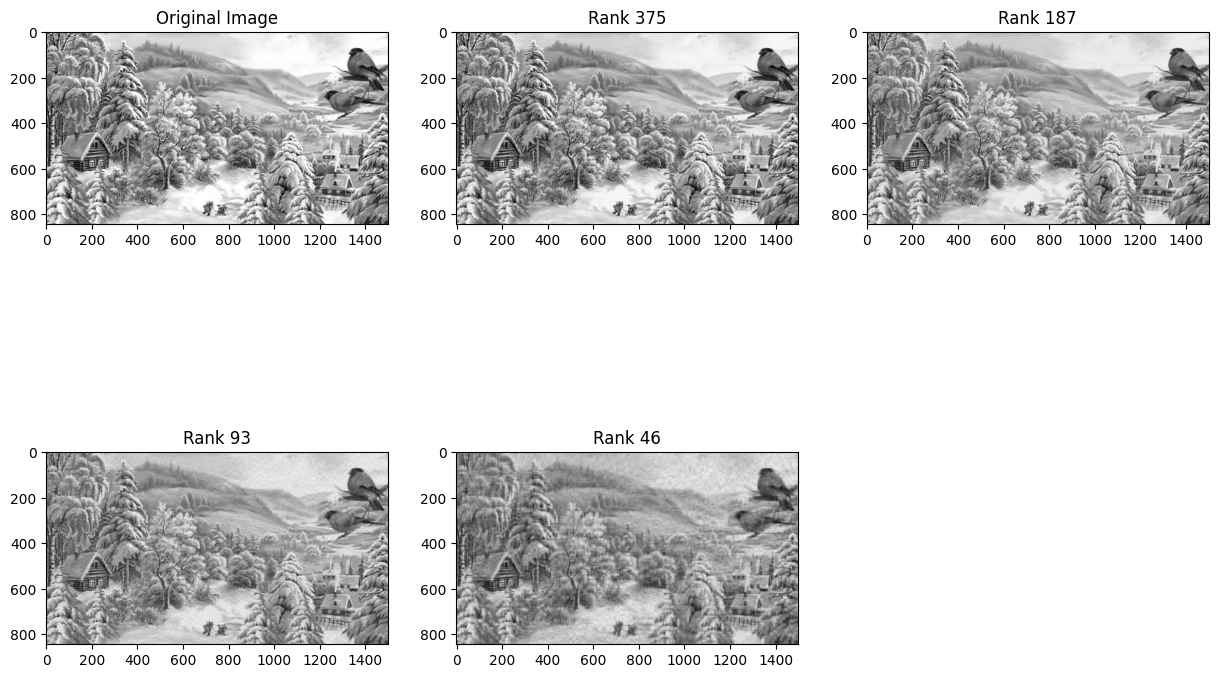

In [ ]:
uploaded = files.upload()
image = io.imread(list(uploaded.keys())[0], as_gray=True)

U, Sigma, Vt = np.linalg.svd(image, full_matrices=False)

def reconstruct_image(U, Sigma, Vt, k):
    return U[:, :k] @ np.diag(Sigma[:k]) @ Vt[:k, :]

ranks = [image.shape[1] // 4, image.shape[1] // 8, image.shape[1] // 16, image.shape[1] // 32]

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

for i, rank in enumerate(ranks):
    reconstructed_image = reconstruct_image(U, Sigma, Vt, rank)
    plt.subplot(2, 3, i+2)
    plt.title(f"Rank {rank}")
    plt.imshow(reconstructed_image, cmap='gray')

plt.show()

##Индивидуальное задание

Разведчик решил передать изображение в виде файла xlsx с svd разложением картинки.
Чтобы в случае перехвата сложнее было восстановить картинку, он транспонировал одну из матриц,
а сингулярные числа сделал надписями строк или столбцов одной из матриц.

Считать из файла "alg_13_ind_v_xx.xlsx" матрицы svd разложения,
восстановить и вывести на экран изображение, которое хотел передать разведчик.

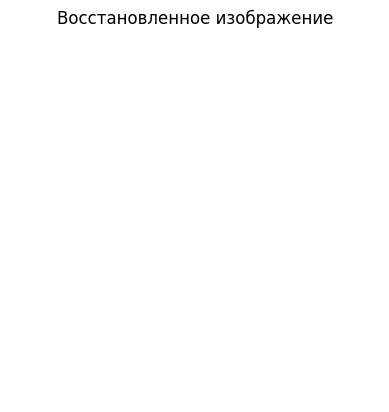

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
uploaded = files.upload()
file_path = "alg_13_ind_v_169.xlsx"

U = pd.read_excel(file_path, sheet_name='u', header=None).values
V = pd.read_excel(file_path, sheet_name='v', header=None).values


sigma_values = pd.read_excel(file_path, sheet_name='u', header=None, nrows=1).values.flatten()


if len(sigma_values) == 0:
    sigma_values = pd.read_excel(file_path, sheet_name='u', header=0, nrows=0).columns.astype(float)


Sigma = np.diag(sigma_values)

Vh = V.T

A_reconstructed = U @ Sigma @ Vh

plt.imshow(A_reconstructed, cmap='gray')
plt.title("Восстановленное изображение")
plt.axis('off')
plt.show()